In [1]:
import pandas as pd
import numpy as np
dataset=pd.read_csv("insurance_pre.csv")
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [2]:
dataset=pd.get_dummies(dataset,drop_first=True)
dataset["sex_male"] = dataset["sex_male"].astype(int)

dataset["smoker_yes"] = dataset["smoker_yes"].astype(int)

In [3]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [4]:
independent=dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]

In [5]:
dependent=dataset[['charges']]

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'criterion': ['squared_error', 'absolute_error'],  
    'max_depth': [None, 5, 10, 20],                  
    'min_samples_split': [2, 5, 10],                
    'min_samples_leaf': [1, 2, 4]                    
}
grid = GridSearchCV(DecisionTreeRegressor(random_state=42),param_grid, refit=True, verbose=3, n_jobs=-1)

grid=grid.fit(independent,dependent)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


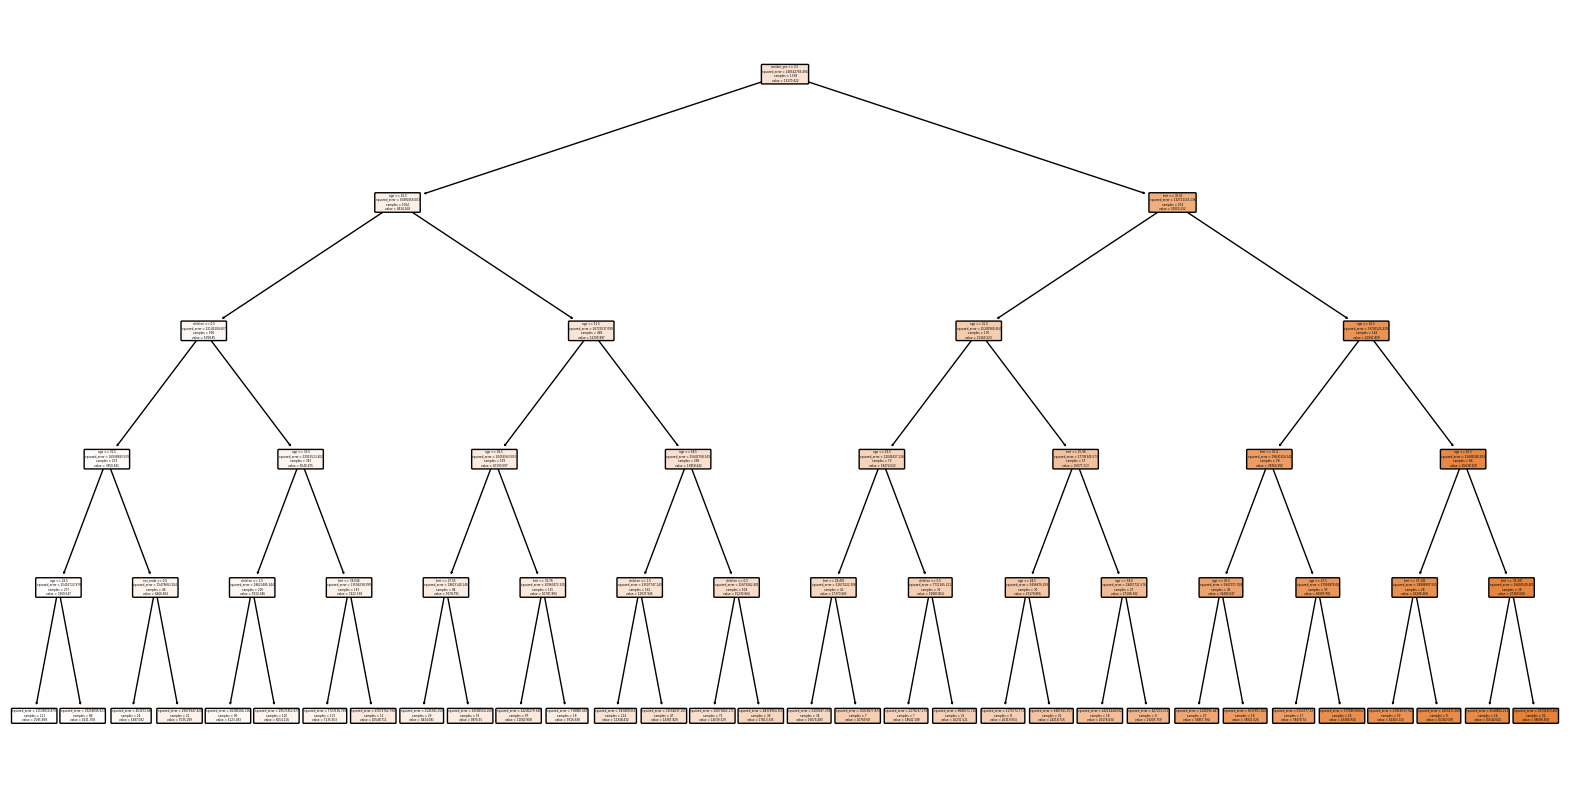

In [13]:
import matplotlib.pyplot as plt
from sklearn import tree
best_tree = grid.best_estimator_
plt.figure(figsize=(20, 10))
tree.plot_tree(best_tree, 
               filled=True, 
               feature_names=independent.columns,  # if you're using a DataFrame
               rounded=True)
plt.show()

In [15]:
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Best Parameters: {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best CV Score: 0.8482064687681768


In [17]:
age_input=float(input("Age:"))
BMI_input=float(input("BMI:"))
child_input=int(input("Childrens:"))
sex_male_input=int(input("Gender(0/1):"))
smoker_yes_input=int(input("Smoker (0/1):"))

Age: 43
BMI: 21.45
Childrens: 2
Gender(0/1): 1
Smoker (0/1): 1


In [18]:
future_prediction=grid.predict([[age_input,BMI_input,child_input,sex_male_input,smoker_yes_input]])
print("Future Predictions:{}".format(future_prediction))

Future Predictions:[20319.05375625]


C:\Users\SAN\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
